<a href="https://colab.research.google.com/github/Omarrhussain/SYNC-S-Internship/blob/main/Sign_Language_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import keras
import cv2
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [25]:
train  = pd.read_csv("/content/sign_mnist_train.csv")
test = pd.read_csv("/content/sign_mnist_test.csv")

In [26]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [27]:
y_train_label = train.iloc[:,0]
y_test_label = test.iloc[:,0]

In [28]:
train = train.iloc[:,1:]
test = test.iloc[:,1:]

In [29]:
train_x = train.values
test_x = test.values
train_x

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [30]:
train_x.shape

(27455, 784)

In [31]:
train_x = train_x - np.mean(train_x) / train_x.std()
test_x = test_x - np.mean(test_x) / train_x.std()

In [32]:
train_x = train_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

In [33]:
train_x[0].shape

(28, 28, 1)

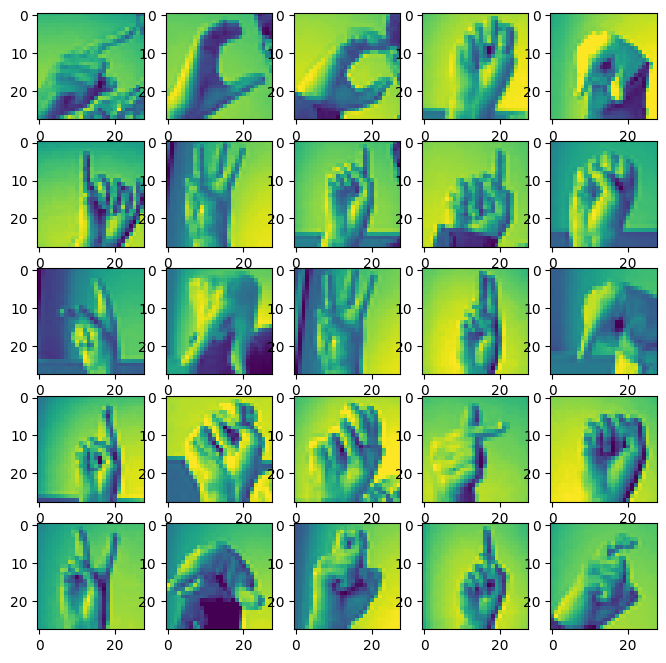

In [34]:
w=10
h=10
fig=plt.figure(figsize=(8,8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = train_x[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(img))
plt.show()

In [35]:
LB = LabelBinarizer()
y_train_label = LB.fit_transform(y_train_label)
y_test_label = LB.fit_transform(y_test_label)
y_train_label.shape

(27455, 24)

In [36]:
xtrain,xval,ytrain,yval=train_test_split(train_x, y_train_label,train_size=0.75,random_state=0)

In [37]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False)

In [38]:
datagen.fit(xtrain)

In [39]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='softmax'))

In [47]:
learning_rate = 1e-3
lr_decay = 1e-6
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
print(xtrain.shape, xval.shape)

(20591, 28, 28, 1) (6864, 28, 28, 1)


In [51]:
history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=32),
                    steps_per_epoch=xtrain.shape[0]//32,
                    epochs=10,
                    verbose=1,
                    validation_data=(xval, yval))

Epoch 1/10


<ipython-input-51-d80f553ba230>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=32),


643/643 [==============================] - 217s 338ms/step - loss: 0.9113 - accuracy: 0.7094 - val_loss: 0.2047 - val_accuracy: 0.9540
Epoch 2/10
643/643 [==============================] - 214s 332ms/step - loss: 0.7869 - accuracy: 0.7587 - val_loss: 0.1368 - val_accuracy: 0.9476
Epoch 3/10
643/643 [==============================] - 215s 334ms/step - loss: 0.7485 - accuracy: 0.7799 - val_loss: 0.1139 - val_accuracy: 0.9685
Epoch 4/10
643/643 [==============================] - 217s 338ms/step - loss: 0.7711 - accuracy: 0.7816 - val_loss: 0.2430 - val_accuracy: 0.9575
Epoch 5/10
643/643 [==============================] - 219s 340ms/step - loss: 0.7588 - accuracy: 0.7915 - val_loss: 0.1201 - val_accuracy: 0.9723
Epoch 6/10
643/643 [==============================] - 217s 338ms/step - loss: 0.7835 - accuracy: 0.7906 - val_loss: 0.0581 - val_accuracy: 0.9784
Epoch 7/10
643/643 [==============================] - 215s 334ms/step - loss: 0.7645 - accuracy: 0.7896 - val_loss: 0.0372 - val_accura

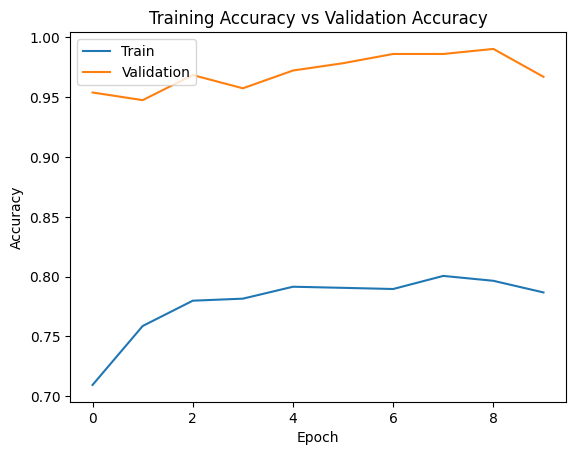

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

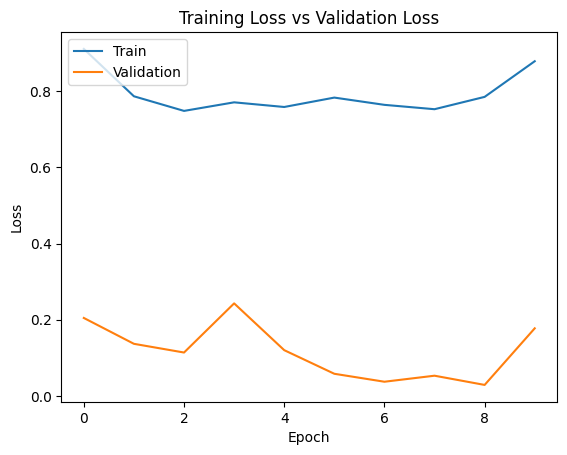

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [54]:
score = model.evaluate(test_x, y_test_label, verbose=0)
print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]*100) + "%")

Loss: 0.2972699701786041
Accuracy: 95.44060230255127%
